In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn

In [3]:
train = pd.read_csv('data/spooky/train.csv')
test = pd.read_csv('data/spooky/test.csv')
train.shape

(19579, 3)

In [730]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [731]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [732]:
set(train.id.values).intersection(test.id.values)

set()

In [733]:
set(train.text.values).intersection(test.text.values)

set()

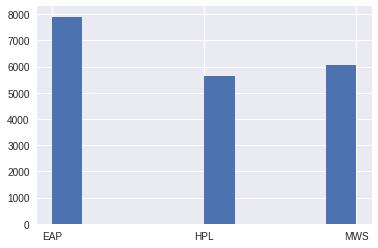

In [734]:
train.author.hist()

In [735]:
X = train[['id', 'text']]
y = train.author

In [736]:
from sklearn.feature_extraction.text import CountVectorizer
N_FEATURES = 300
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=N_FEATURES,
                                binary=False,
                                stop_words=None)

tf_vectorizer.fit(train.text.append(test.text))

tf_train = tf_vectorizer.transform(train.text)
tf_test = tf_vectorizer.transform(test.text)

In [737]:
cv_train = pd.DataFrame(tf_train.todense(),
                        columns=tf_vectorizer.get_feature_names())
cv_test = pd.DataFrame(tf_test.todense(), 
                       columns=tf_vectorizer.get_feature_names())
cv_train.head()

,about,above,after,again,against,air,all,almost,alone,also,...,within,without,words,world,would,years,yet,you,young,your
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [738]:
print(cv_train.sum(axis=0).min())
print(cv_test.sum(axis=0).min())

157
59


In [739]:
print(train.shape)
print(cv_train.shape)

(19579, 3)
(19579, 300)


In [740]:
X = pd.concat((X, cv_train), axis=1)
test = pd.concat((test, cv_test), axis=1)
X.head()

,id,text,about,above,after,again,against,air,all,almost,...,within,without,words,world,would,years,yet,you,young,your
0,id26305,"This process, however, afforded me no means of...",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,id17569,It never once occurred to me that the fumbling...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id11008,"In his left hand was a gold snuff box, from wh...",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id27763,How lovely is spring As we looked from Windsor...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,id12958,"Finding nothing else, not even gold, the Super...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [741]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
y_encoder.classes_

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [742]:
TRAIN_COLUMNS = tf_vectorizer.get_feature_names()

In [743]:
X['comma_ratio'] = X.text.apply(lambda x: x.count(',')/len(x))
test['comma_ratio'] = test.text.apply(lambda x: x.count(',')/len(x))

In [744]:
TRAIN_COLUMNS.append('comma_ratio')

In [745]:
X['dot_ratio'] = X.text.apply(lambda x: x.count('.')/len(x))
test['dot_ratio'] = test.text.apply(lambda x: x.count('.')/len(x))

In [746]:
TRAIN_COLUMNS.append('dot_ratio')

In [747]:
X['qmark_ratio'] = X.text.apply(lambda x: x.count('?')/len(x))
test['qmark_ratio'] = test.text.apply(lambda x: x.count('?')/len(x))

In [748]:
TRAIN_COLUMNS.append('qmark_ratio')

In [749]:
X['exmark_ratio'] = X.text.apply(lambda x: x.count('!')/len(x))
test['exmark_ratio'] = test.text.apply(lambda x: x.count('!')/len(x))

In [750]:
TRAIN_COLUMNS.append('exmark_ratio')

In [751]:
X['mayus_ratio'] = X.text.apply(lambda x: sum(map(str.isupper, x))/len(x))
test['mayus_ratio'] = test.text.apply(lambda x: sum(map(str.isupper, x))/len(x))

In [752]:
#TRAIN_COLUMNS.append('mayus_ratio')
TRAIN_COLUMNS = [t for t in TRAIN_COLUMNS if t != 'mayus_ratio']

In [758]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(X[TRAIN_COLUMNS])
X['km'] = kmeans.predict(X[TRAIN_COLUMNS])
X_test['km'] = kmeans.predict(X_test[TRAIN_COLUMNS])

TRAIN_COLUMNS.append('km')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [759]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=999)

In [760]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=999,
                               n_jobs=-1)
model.fit(X_train[TRAIN_COLUMNS], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=999,
            verbose=0, warm_start=False)

In [761]:
from sklearn.metrics import log_loss
print('Error train: %f' % log_loss(y_train, 
                            model.predict_proba(X_train[TRAIN_COLUMNS])))
print('Error test: %f' % log_loss(y_test, 
                            model.predict_proba(X_test[TRAIN_COLUMNS])))

Error train: 0.217774
Error test: 0.822036


In [563]:
predict = model.predict_proba(test[TRAIN_COLUMNS])


In [566]:
df = pd.DataFrame(data=predict, columns=y_encoder.classes_)
subm = pd.concat((test, df), 
                 axis=1)[['id']+list(y_encoder.classes_)]
subm.to_csv('subm1.csv', index=False)

In [522]:
X_train['km'] = kmeans.predict(X_train[TRAIN_COLUMNS])
X_test['km'] = kmeans.predict(X_test[TRAIN_COLUMNS])

In [523]:
TRAIN_COLUMNS.append('km')

In [455]:
X['mayus_ratio'] = X.text.apply(lambda x: sum(map(str.isupper, x))/len(x))
test['mayus_ratio'] = test.text.apply(lambda x: sum(map(str.isupper, x))/len(x))

In [456]:
TRAIN_COLUMNS.append('mayus_ratio')

In [457]:
X['dot_ratio'] = X.text.apply(lambda x: x.count('.')/len(x))
test['dot_ratio'] = test.text.apply(lambda x: x.count('.')/len(x))

In [337]:
TRAIN_COLUMNS.append('dot_ratio')

In [464]:
print(X_train.shape)
print(X_test.shape)

(14684, 306)
(4895, 306)


In [458]:
X['contract_ratio'] = X.text.apply(lambda x: x.count('\'')/len(x))
test['contract_ratio'] = test.text.apply(lambda x: x.count('\'')/len(x))

In [459]:
TRAIN_COLUMNS.append('contract_ratio')

In [ ]:
from nltk.corpus import stopwords
import string
import re
from sklearn import svm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag, ne_chunk, tree2conlltags

def get_persons(text):
    # Some names have family and given names, but both belong to the same person
    # Bind them!
    def bind_names(tagged_words):
        names = list()
        name = list()
        # Bind several consequtive words with 'PERSON' tag
        for i, w in enumerate(tagged_words):
            if i == 0:
                continue
            if "PERSON" in w[2]:
                name.append(w[0])
            else:
                if len(name) != 0:
                    names.append(" ".join(name))
                name = list()
        return names
        
    res_ne_tree = ne_chunk(pos_tag(word_tokenize(text)))
    res_ne = tree2conlltags(res_ne_tree)
    res_ne_list = [list(x) for x in res_ne]
    return bind_names(res_ne_list)

per = X.text.apply(lambda x: get_persons(x))

In [462]:
X.head()

,id,text,account,adrian,age,air,altogether,ancient,appearance,appeared,...,work,world,year,years,young,youth,comma_ratio,mayus_ratio,dot_ratio,contract_ratio
0,id26305,"This process, however, afforded me no means of...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.017316,0.012987,0.004329,0
1,id17569,It never once occurred to me that the fumbling...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.014085,0.014085,0
2,id11008,"In his left hand was a gold snuff box, from wh...",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.020000,0.005000,0.005000,0
3,id27763,How lovely is spring As we looked from Windsor...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.014563,0.019417,0.004854,0
4,id12958,"Finding nothing else, not even gold, the Super...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.011494,0.011494,0.005747,0


In [465]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=999, n_jobs=-1)
model.fit(X_train[TRAIN_COLUMNS], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=999,
            verbose=0, warm_start=False)

In [466]:
from sklearn.metrics import log_loss
print('Error train: %f' % log_loss(y_train, model.predict_proba(X_train[TRAIN_COLUMNS])))
print('Error test: %f' % log_loss(y_test, model.predict_proba(X_test[TRAIN_COLUMNS])))

Error train: 0.253487
Error test: 0.965765


In [378]:
predict = model.predict_proba(test[TRAIN_COLUMNS])

In [379]:
predict

array([[ 0.235,  0.125,  0.64 ],
       [ 0.645,  0.205,  0.15 ],
       [ 0.105,  0.72 ,  0.175],
       ..., 
       [ 0.715,  0.2  ,  0.085],
       [ 0.31 ,  0.295,  0.395],
       [ 0.43 ,  0.375,  0.195]])

In [391]:
subm = pd.concat((test, pd.DataFrame(data=predict, columns=y_encoder.classes_)), axis=1)[['id']+list(y_encoder.classes_)]
subm.to_csv('subm1.csv', index=False)